In [9]:
from lambeq import BobcatParser

# sentence = 'Alice does love bob'
# filename="alice_long.qasm"

sentence = 'Alice loves bob'
filename="alice_short.qasm"

# Get a string diagram
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

Diagram(dom=Ty(), cod=Ty(qubit), layers=[Layer(left=Ty(), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rx(Alice__n_0); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rz(Alice__n_1); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rx(Alice__n_2); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[CRz(loves__n.r@s@n.l_0); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit), box=[CRz(loves__n.r@s@n.l_1); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], ri

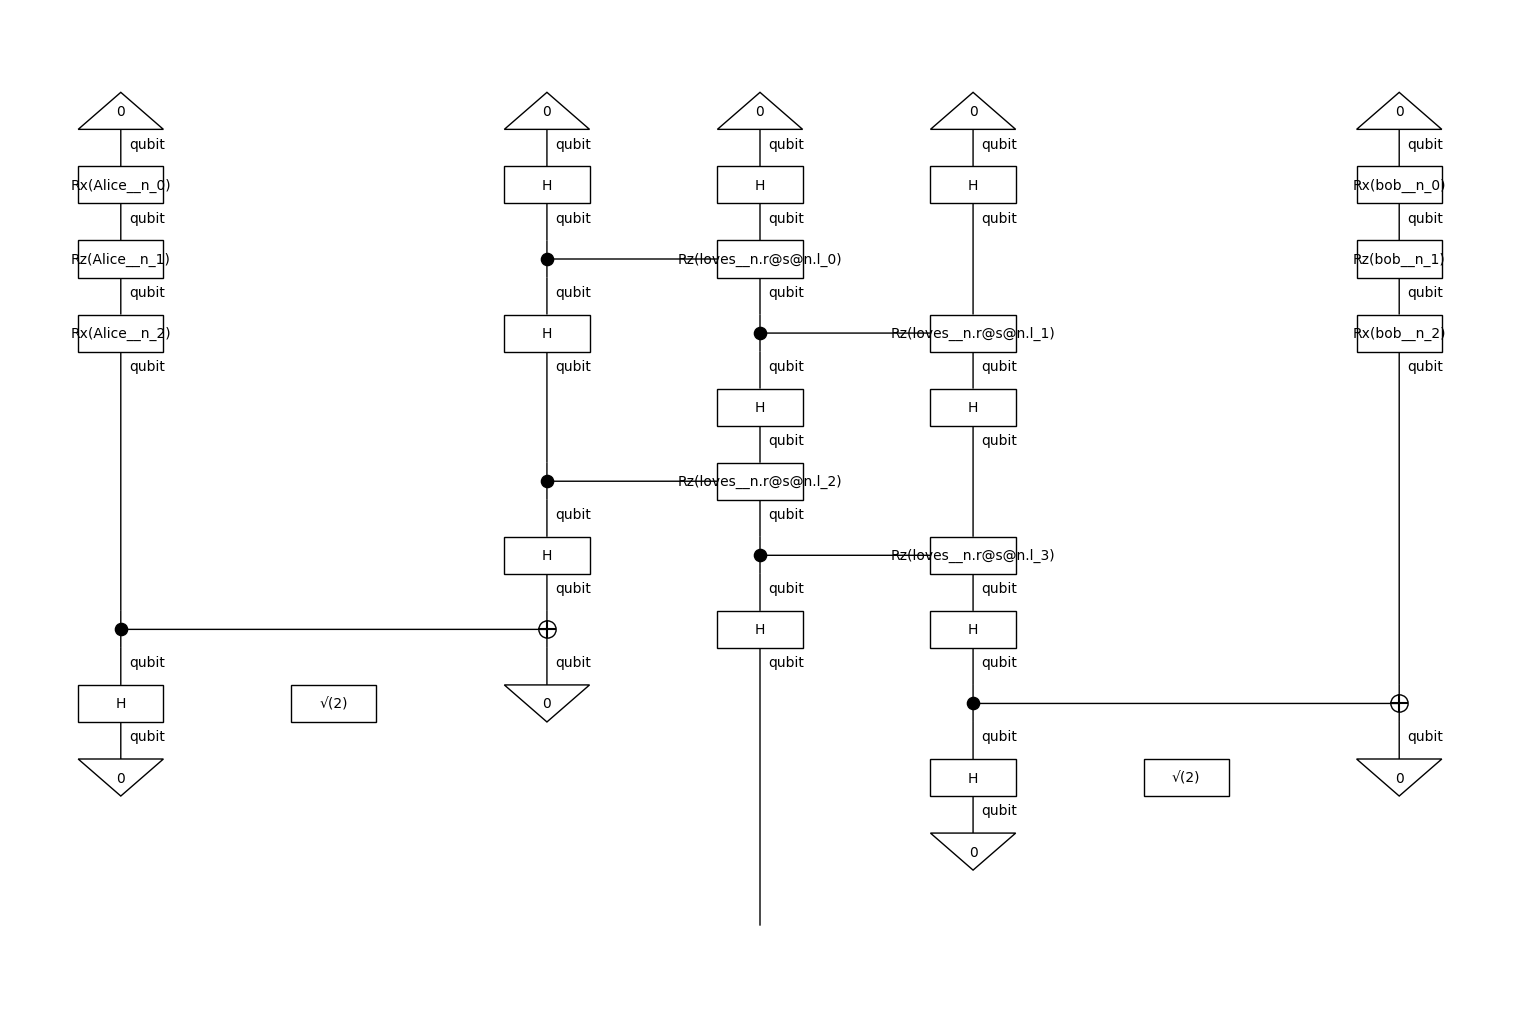

Diagram(dom=Ty(), cod=Ty(qubit), layers=[Layer(left=Ty(), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rz(Alice__n_0); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Ry(Alice__n_1); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rz(Alice__n_2); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[Rz(loves__n.r@s@n.l_0); Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit), box=[Ry(loves__n.r@s@n.l_1); Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit), box=[Rz(loves__n.r@s@n.l_2); Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit @ qubit), box=[Rz(loves__n.r@s@n.l_3); Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit), box=[Ry(loves__n.r@s@n

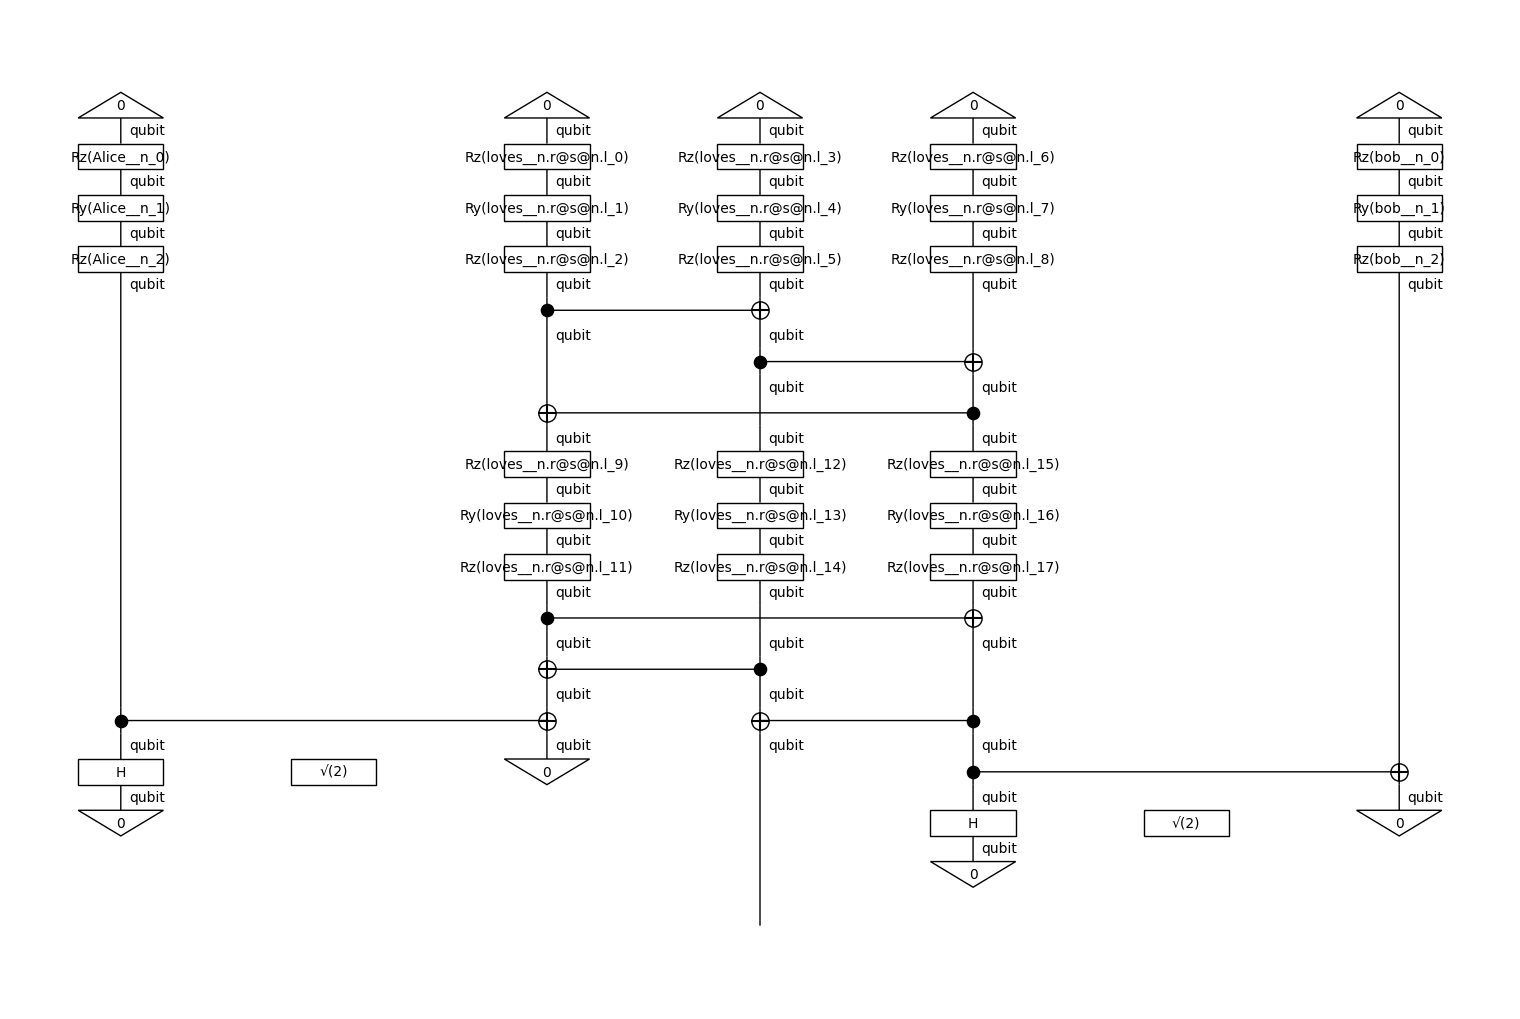

In [10]:
from lambeq import AtomicType, IQPAnsatz,StronglyEntanglingAnsatz

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz1 = IQPAnsatz({N: 1, S: 1}, n_layers=2)
ansatz2 = StronglyEntanglingAnsatz({N: 1, S: 1}, n_layers=2)

circuit1 = ansatz1(diagram)
print(circuit1)
circuit1.draw(figsize=(15,10))

circuit2 = ansatz2(diagram)
print(circuit2)
circuit2.draw(figsize=(15,10))


In [11]:

from pytket.circuit.display import render_circuit_jupyter

tket_circuit = circuit2.to_tk()
render_circuit_jupyter(tket_circuit)

from pytket.qasm import circuit_to_qasm_str
# Convert the PyTKet circuit to QASM format
qasm_output = circuit_to_qasm_str(tket_circuit,maxwidth=99)
print(qasm_output)
with open(filename, "w") as qasm_file:
    qasm_file.write(qasm_output)


OPENQASM 2.0;
include "qelib1.inc";

qreg q[5];
creg c[4];
rz((2*Alice__n_0)*pi) q[0];
rz((2*loves__n.r@s@n.l_0)*pi) q[1];
rz((2*loves__n.r@s@n.l_3)*pi) q[2];
rz((2*loves__n.r@s@n.l_6)*pi) q[3];
rz((2*bob__n_0)*pi) q[4];
ry((2*Alice__n_1)*pi) q[0];
ry((2*loves__n.r@s@n.l_1)*pi) q[1];
ry((2*loves__n.r@s@n.l_4)*pi) q[2];
ry((2*loves__n.r@s@n.l_7)*pi) q[3];
ry((2*bob__n_1)*pi) q[4];
rz((2*Alice__n_2)*pi) q[0];
rz((2*loves__n.r@s@n.l_2)*pi) q[1];
rz((2*loves__n.r@s@n.l_5)*pi) q[2];
rz((2*loves__n.r@s@n.l_8)*pi) q[3];
rz((2*bob__n_2)*pi) q[4];
cx q[1],q[2];
cx q[2],q[3];
cx q[3],q[1];
rz((2*loves__n.r@s@n.l_12)*pi) q[2];
rz((2*loves__n.r@s@n.l_9)*pi) q[1];
ry((2*loves__n.r@s@n.l_13)*pi) q[2];
rz((2*loves__n.r@s@n.l_15)*pi) q[3];
ry((2*loves__n.r@s@n.l_10)*pi) q[1];
rz((2*loves__n.r@s@n.l_14)*pi) q[2];
ry((2*loves__n.r@s@n.l_16)*pi) q[3];
rz((2*loves__n.r@s@n.l_11)*pi) q[1];
rz((2*loves__n.r@s@n.l_17)*pi) q[3];
cx q[1],q[3];
cx q[2],q[1];
cx q[0],q[1];
cx q[3],q[2];
measure q[1] -> c[3];
h q

In [12]:
# from pytket.extensions.qiskit import tk_to_qiskit

# qiskit_circuit = tk_to_qiskit(tket_circuit)

# def convert_lambeq_circuit_to_tket_to_qasm(circuit, filename):
#     from pytket.circuit.display import render_circuit_jupyter
#     tket_circuit = circuit.to_tk()
#     render_circuit_jupyter(tket_circuit)
#     from pytket.qasm import circuit_to_qasm_str
#     # Convert the PyTKet circuit to QASM format
#     qasm_output = circuit_to_qasm_str(tket_circuit)
#     print(qasm_output)
#     with open(filename, "w") as qasm_file:
#         qasm_file.write(qasm_output)




In [ ]:
from mqt import qcec

# verify the equivalence of two circuits provided as qasm files
# result = qcec.verify("circ1.qasm", "circ2.qasm")
result = qcec.verify("alice_long.qasm", "alice_short.qasm")


# print the result
print(result.equivalence)

: 